In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam


In [2]:
# cifar is a dataset for 10 different classes of animals
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

x_train=x_train/255.0
x_test=x_test/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Training data shape:(50000, 32, 32, 3)
test data shape:(10000, 32, 32, 3)


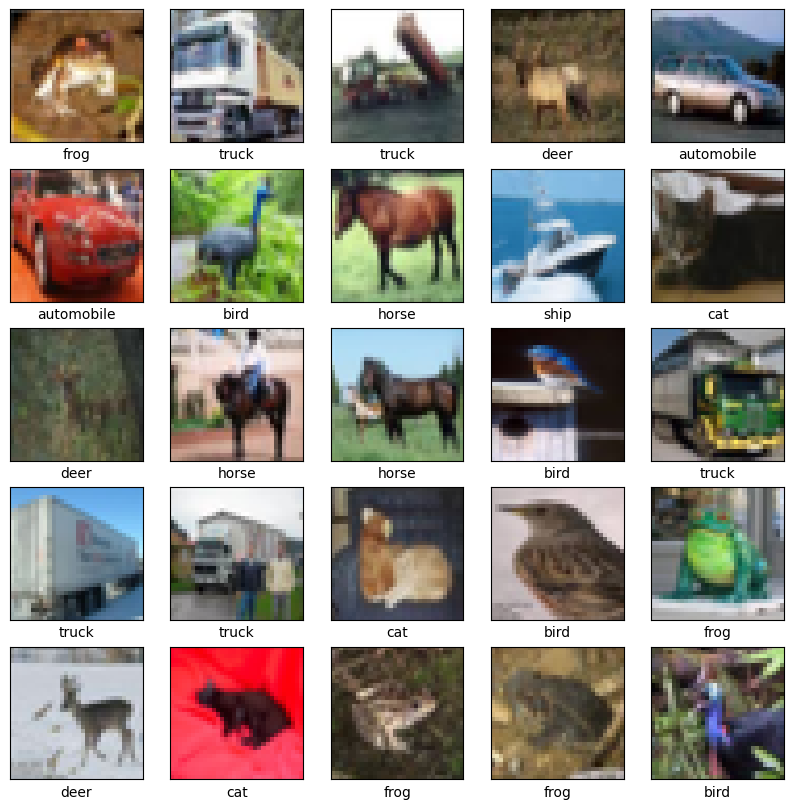

In [3]:
print(f'Training data shape:{x_train.shape}')
print(f'test data shape:{x_test.shape}')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])

plt.show()

In [4]:
model=keras.Sequential([
        keras.Input(shape=(32,32,3)),#32 for height 32 for width and 3 for rgb colors
        layers.Conv2D(32,(3,3),padding='valid',activation='relu'), #32 filter of size 3x3 for each layer 
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(128,(3,3),padding='valid',activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation="softmax")
    ]
)



In [5]:
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.3455 - loss: 1.7694 - val_accuracy: 0.5241 - val_loss: 1.3168
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5791 - loss: 1.1866 - val_accuracy: 0.6186 - val_loss: 1.0816
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6463 - loss: 1.0053 - val_accuracy: 0.6567 - val_loss: 0.9758
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6875 - loss: 0.8906 - val_accuracy: 0.6637 - val_loss: 0.9618
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7182 - loss: 0.8148 - val_accuracy: 0.6760 - val_loss: 0.9366
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.7339 - loss: 0.7547 - val_accuracy: 0.6966 - val_loss: 0.8929
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.7565 - loss: 0.6931 - val_accuracy: 0.7032 - val_loss: 0.8707
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.7789 -

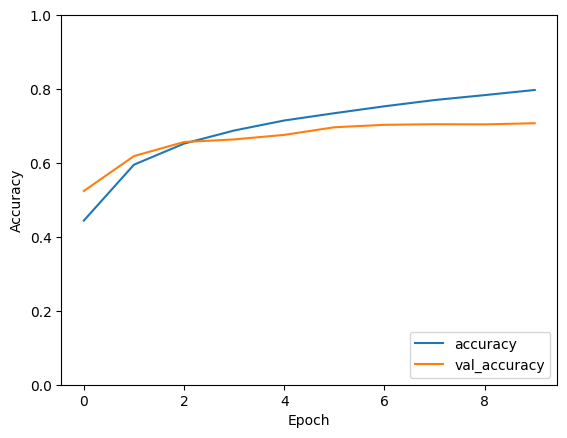

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


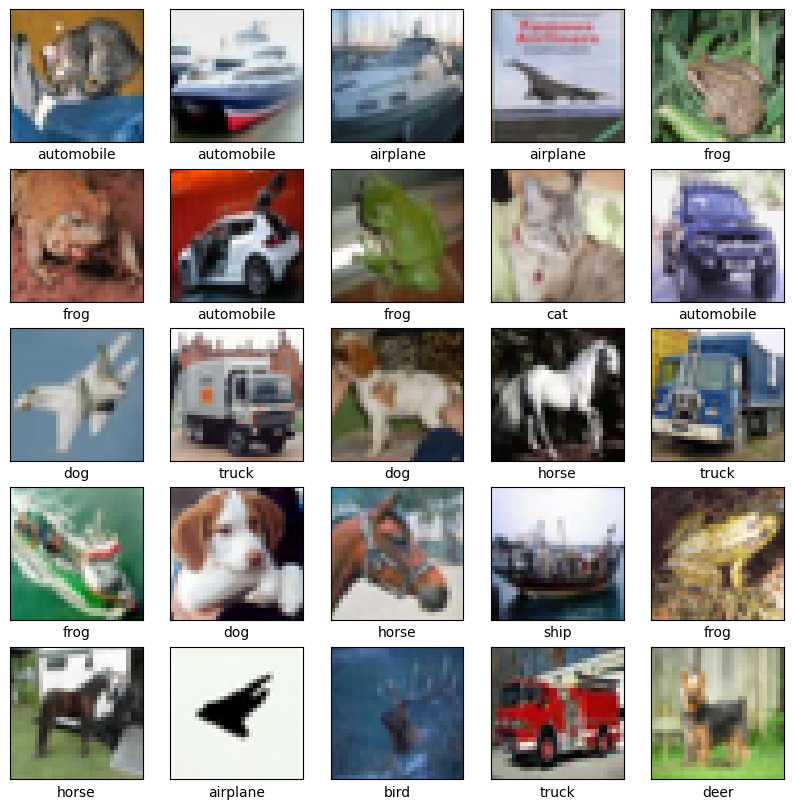

In [8]:
# Plot training history

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Visualize some predictions
predictions = model.predict(x_test)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()


In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Save the model weights
model.save_weights('modelcnn.h5')


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8181 - loss: 0.5139 - val_accuracy: 0.7184 - val_loss: 0.8759
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8302 - loss: 0.4818 - val_accuracy: 0.6882 - val_loss: 1.0336
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8414 - loss: 0.4446 - val_accuracy: 0.7045 - val_loss: 0.9465
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 22ms/step - accuracy: 0.8491 - loss: 0.4248 - val_accuracy: 0.7098 - val_loss: 0.9845
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8568 - loss: 0.3959 - val_accuracy: 0.7028 - val_loss: 0.9872
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8707 - loss: 0.3678 - val_accuracy: 0.7118 - val_loss: 1.0104
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 22ms/step - accuracy: 0.8725 - loss: 0.3540 - val_accuracy: 0.7090 - val_loss: 1.0746
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8834 -

ValueError: The filename must end in `.weights.h5`. Received: filepath=modelcnn.h5

In [14]:
model.save_weights('modelcnn.weights.h5')